<a href="https://colab.research.google.com/github/tomoyukiharada/Kaggle-team/blob/team1/kaggle(2)_yoshida.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##API

In [1]:
!pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
import json
f = open("/content/drive/MyDrive/kaggle.json", 'r')
json_data = json.load(f)
os.environ['KAGGLE_USERNAME'] = json_data['username']
os.environ['KAGGLE_KEY'] = json_data['key']

In [ ]:
!kaggle competitions download -c playground-series-s4e6

In [ ]:
!unzip playground-series-s4e6.zip

##データ読み込み

In [6]:
!pip install tensorflow

In [82]:
!pip install keras_tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.5 MB/s eta 0:00:00


In [154]:
import pandas as pd
import numpy as np
import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import keras_tuner as kt
from keras_tuner import Hyperband

In [8]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [9]:
train.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


In [10]:
train.describe()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,...,76518.00000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000
mean,38258.500000,1.111934,16.054419,1.644410,9001.286377,0.915314,3.658760,132.378766,1.226600,19.837633,...,0.05796,0.137053,5.933414,7.234468,4.007201,9.626085,0.062443,11.520340,1.228218,-0.080921
std,22088.988286,0.441669,16.682337,1.229645,1803.438531,0.278416,8.623774,10.995328,3.392183,15.399456,...,0.40849,0.933830,1.627182,3.503040,2.772956,5.546035,0.462107,2.653375,1.398816,2.251382
min,0.000000,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,19129.250000,1.000000,1.000000,1.000000,9119.000000,1.000000,1.000000,125.000000,1.000000,1.000000,...,0.00000,0.000000,5.000000,6.000000,1.000000,10.000000,0.000000,9.400000,0.300000,-1.700000
50%,38258.500000,1.000000,17.000000,1.000000,9254.000000,1.000000,1.000000,133.100000,1.000000,19.000000,...,0.00000,0.000000,6.000000,7.000000,5.000000,12.142857,0.000000,11.100000,1.400000,0.320000
75%,57387.750000,1.000000,39.000000,2.000000,9670.000000,1.000000,1.000000,140.000000,1.000000,37.000000,...,0.00000,0.000000,6.000000,9.000000,6.000000,13.244048,0.000000,12.700000,2.600000,1.790000
max,76517.000000,6.000000,53.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,...,12.00000,19.000000,23.000000,33.000000,20.000000,18.000000,12.000000,16.200000,3.700000,3.510000


In [11]:
train.isnull().any()

id                                                False
Marital status                                    False
Application mode                                  False
Application order                                 False
Course                                            False
Daytime/evening attendance                        False
Previous qualification                            False
Previous qualification (grade)                    False
Nacionality                                       False
Mother's qualification                            False
Father's qualification                            False
Mother's occupation                               False
Father's occupation                               False
Admission grade                                   False
Displaced                                         False
Educational special needs                         False
Debtor                                            False
Tuition fees up to date                         

欠損値なし？

##データ成形

In [14]:
target = pd.get_dummies(train["Target"], dtype="uint8")

In [15]:
target

,Dropout,Enrolled,Graduate
0,0,0,1
1,1,0,0
2,1,0,0
3,0,1,0
4,0,0,1
...,...,...,...
76513,0,0,1
76514,0,0,1
76515,0,1,0
76516,1,0,0


##モデル作成（DNN）

In [16]:
train_ = train.drop(["id", "Target"], axis=1)

In [165]:
X_train, X_test, y_train, y_test = train_test_split(train_, target, test_size=0.2, random_state=1)

In [23]:
X_train.shape[0]

61214

In [144]:
def build_model(hp):
  model = models.Sequential()
  model.add(layers.Dense(512, input_shape=(X_train.shape[1], )))
  for i in range(hp.Int("num_layer", 2, 20)):
    model.add(layers.Dense(hp.Int("units_" + str(i),
                            min_value=32,
                            max_value=512,
                            step=32),
                            activation="relu"))
    if hp.Choice("batchnorm_and_dropout", ["batch", "dropout", "both"]) == "batch":
      model.add(layers.BatchNormalization())
    elif hp.Choice("batchnorm_and_dropout", ["batch", "dropout", "both"]) == "drooput":
      model.add(layers.Dropout(0.1))
    else:
      model.add(layers.BatchNormalization())
      model.add(layers.Dropout(0.1))

  model.add(layers.Dense(3, activation="softmax"))
  model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
  return model





In [112]:
tuner = Hyperband(build_model,
                              objective="accuracy",
                              max_epochs=10,
                              factor=3,
                              directory="my_dir",
                              project_name="first_keras")

Reloading Tuner from my_dir/first_keras/tuner0.json


In [145]:
tuner.search(X_train, y_train, validation_split=0.2, epochs=100)

In [146]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [147]:
model = tuner.hypermodel.build(best_hps)

In [148]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 512)               18944     
                                                                 
 dense_25 (Dense)            (None, 128)               65664     
                                                                 
 batch_normalization_20 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 dense_26 (Dense)            (None, 416)               53664     
                                                                 
 batch_normalization_21 (Ba  (None, 416)               1664      
 tchNormalization)                                               
                                                                 
 dense_27 (Dense)            (None, 512)              

In [149]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [150]:
X_train.shape

(61214, 36)

In [155]:
cs = keras.callbacks.EarlyStopping(monitor="accuracy", patience=10)

In [156]:
history = model.fit(X_train, y_train, epochs=150, batch_size=128, callbacks=cs)

Epoch 1/150
479/479 [==============================] - 10s 14ms/step - loss: 0.6157 - accuracy: 0.7541
Epoch 2/150
479/479 [==============================] - 7s 14ms/step - loss: 0.5360 - accuracy: 0.7882
Epoch 3/150
479/479 [==============================] - 6s 13ms/step - loss: 0.5202 - accuracy: 0.7953
Epoch 4/150
479/479 [==============================] - 6s 13ms/step - loss: 0.5100 - accuracy: 0.8025
Epoch 5/150
479/479 [==============================] - 6s 13ms/step - loss: 0.5042 - accuracy: 0.8045
Epoch 6/150
479/479 [==============================] - 6s 14ms/step - loss: 0.4968 - accuracy: 0.8082
Epoch 7/150
479/479 [==============================] - 6s 13ms/step - loss: 0.5011 - accuracy: 0.8059
Epoch 8/150
479/479 [==============================] - 7s 14ms/step - loss: 0.4992 - accuracy: 0.8058
Epoch 9/150
479/479 [==============================] - 6s 13ms/step - loss: 0.4942 - accuracy: 0.8086
Epoch 10/150
479/479 [==============================] - 7s 14ms/step - loss: 0.49

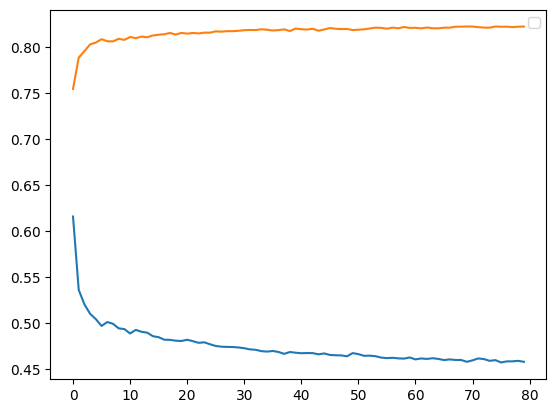

In [157]:
plt.plot(history.history["loss"])
plt.plot(history.history["accuracy"])
plt.legend()
plt.show()

In [163]:
pred = model.predict(X_test)
pred = np.argmax(pred, axis=1)

479/479 [==============================] - 1s 2ms/step


In [166]:
y_test = np.argmax(y_test, axis=1)

In [167]:
y_test

array([0, 1, 0, ..., 2, 2, 2])

In [168]:
accuracy_score(y_test, pred)

0.32494772608468375